# Resultados y visualizaciones de los meta-modelos

otra vez, hay que usar el entorno de quantstats

In [39]:
import sys
import os
import pandas as pd

# Añadir el directorio raíz del proyecto al PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import quantstats as qs
import numpy as np
import seaborn as sns

### Funciones auxiliares

In [36]:

# Función para calcular Beta manualmente
def calculate_beta(strategy_returns: pd.Series, benchmark_returns: pd.Series):
    covariance_matrix = np.cov(strategy_returns, benchmark_returns)
    beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    return beta

# Función para calcular Alpha manualmente
def calculate_alpha(strategy_returns: pd.Series, benchmark_returns: pd.Series, rf_rate: float = 0.0):
    beta = calculate_beta(strategy_returns, benchmark_returns)
    excess_strategy_returns = strategy_returns.mean() - rf_rate
    excess_benchmark_returns = benchmark_returns.mean() - rf_rate
    alpha = excess_strategy_returns - beta * excess_benchmark_returns
    return alpha * 252  # Annualizar el alpha

# Función para calcular las estadísticas
def calculate_statistics(returns: pd.Series, benchmark: pd.Series):
    stats = {
        'Cumulative Returns': qs.stats.compsum(returns).iloc[-1],
        'Annualized Return': qs.stats.cagr(returns),
        'Volatility': qs.stats.volatility(returns),
        'Sharpe Ratio': qs.stats.sharpe(returns),
        'Sortino Ratio': qs.stats.sortino(returns),
        'Maximum Drawdown': qs.stats.max_drawdown(returns),
        'Calmar Ratio': qs.stats.calmar(returns),
        'Value at Risk (VaR)': qs.stats.var(returns),
        'Alpha': calculate_alpha(returns, benchmark),
        'Beta': calculate_beta(returns, benchmark)
    }
    return stats


def calculate_cumm_returns(returns):
    return (1 + returns).cumprod() - 1


# Resultados SPY

In [31]:
SPY_ORIG_META_RETURNS = pd.read_parquet(r'meta_model_spy_original_results.parquet')
SPY_VOLUME_META_RETURNS = pd.read_parquet(r'meta_model_spy_volume_results.parquet')
SPY_DOLLAR_META_RETURNS = pd.read_parquet(r'meta_model_spy_dollar_results.parquet')

SPY_ORIG_META_RETURNS.set_index('date', inplace = True)
SPY_VOLUME_META_RETURNS.set_index('date', inplace = True)
SPY_DOLLAR_META_RETURNS.set_index('date', inplace = True)

In [33]:
spy_orig_meta_returns_buy_and_hold = SPY_ORIG_META_RETURNS['buy_and_hold']
spy_orig_meta_returns_filtered = SPY_ORIG_META_RETURNS['filtered_returns']
spy_orig_meta_returns_predicted = SPY_ORIG_META_RETURNS['predicted_returns']

spy_orig_meta_returns_buy_and_hold_stats = calculate_statistics(SPY_ORIG_META_RETURNS['buy_and_hold'], SPY_ORIG_META_RETURNS['buy_and_hold'])
spy_orig_meta_returns_filtered_stats = calculate_statistics(SPY_ORIG_META_RETURNS['filtered_returns'], SPY_ORIG_META_RETURNS['buy_and_hold'])
spy_orig_meta_returns_predicted_stats = calculate_statistics(SPY_ORIG_META_RETURNS['predicted_returns'], SPY_ORIG_META_RETURNS['buy_and_hold'])

spy_volume_meta_returns_filtered_stats = calculate_statistics(SPY_VOLUME_META_RETURNS['filtered_returns'], SPY_VOLUME_META_RETURNS['buy_and_hold'])
spy_volume_meta_returns_predicted_stats = calculate_statistics(SPY_VOLUME_META_RETURNS['predicted_returns'], SPY_VOLUME_META_RETURNS['buy_and_hold'])

spy_dollar_meta_returns_filtered_stats = calculate_statistics(SPY_DOLLAR_META_RETURNS['filtered_returns'], SPY_DOLLAR_META_RETURNS['buy_and_hold'])
spy_dollar_meta_returns_predicted_stats = calculate_statistics(SPY_DOLLAR_META_RETURNS['predicted_returns'], SPY_DOLLAR_META_RETURNS['buy_and_hold'])

In [35]:
stats_df = pd.DataFrame({
    'Benchmark (S&P 500)': spy_orig_meta_returns_buy_and_hold_stats,
    'PPO Original Bars': spy_orig_meta_returns_predicted_stats,
    'PPO + Meta-labeling Original Bars': spy_orig_meta_returns_filtered_stats,
    'PPO Volume Bars': spy_volume_meta_returns_predicted_stats,
    'PPO + Meta-labeling Volume Bars': spy_volume_meta_returns_filtered_stats,
    'PPO Dollar Bars': spy_dollar_meta_returns_predicted_stats,
    'PPO + Meta-labeling Dollar Bars': spy_dollar_meta_returns_filtered_stats,
})
stats_df = stats_df.T
stats_df

,Cumulative Returns,Annualized Return,Volatility,Sharpe Ratio,Sortino Ratio,Maximum Drawdown,Calmar Ratio,Value at Risk (VaR),Alpha,Beta
Benchmark (S&P 500),0.146164,0.215712,0.005481,0.132978,0.190605,-0.058220,3.705139,-0.000565,0.000000,1.000000
PPO Original Bars,0.063272,0.091818,0.004362,0.075786,0.106382,-0.060685,1.513013,-0.000451,-0.000131,0.633184
PPO + Meta-labeling Original Bars,0.239120,0.359320,0.005227,0.217260,0.315196,-0.041652,8.626689,-0.000537,0.000473,0.909376
PPO Volume Bars,0.100217,0.146540,0.012673,0.562318,0.795045,-0.032814,4.465788,-0.001285,0.003226,0.379526
PPO + Meta-labeling Volume Bars,0.147542,0.217805,0.016456,0.625202,0.886677,-0.028547,7.629647,-0.001664,0.003709,0.640292
PPO Dollar Bars,0.078620,0.114452,0.010654,0.222184,0.303689,-0.034464,3.320948,-0.001095,-0.000408,0.652786
PPO + Meta-labeling Dollar Bars,0.241783,0.363504,0.011943,0.559471,0.798229,-0.032436,11.206817,-0.001211,0.003192,0.820850


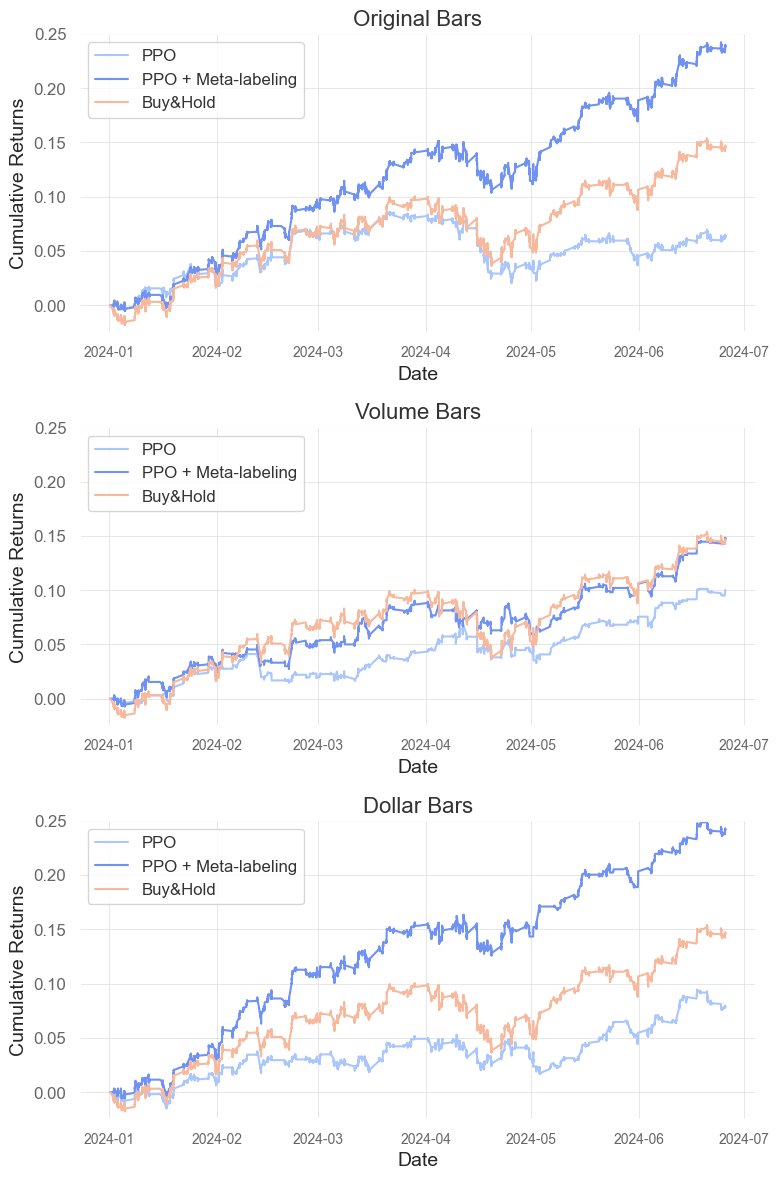

In [57]:
palette = sns.color_palette("coolwarm", 5)
palette = [palette[1], palette[0], palette[3]]  # Cambiar el segundo color por 'darkorange'

filename = 'final_spy_strategy_comparison_vertical'
# plots en vertical
plt.figure(figsize=(8, 12))

# Plot 1: Original Bars
plt.subplot(3, 1, 1)
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Original Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

# Plot 2: Volume Bars
plt.subplot(3, 1, 2)
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Volume Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

# Plot 3: Dollar Bars
plt.subplot(3, 1, 3)
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Dollar Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')

plt.show()

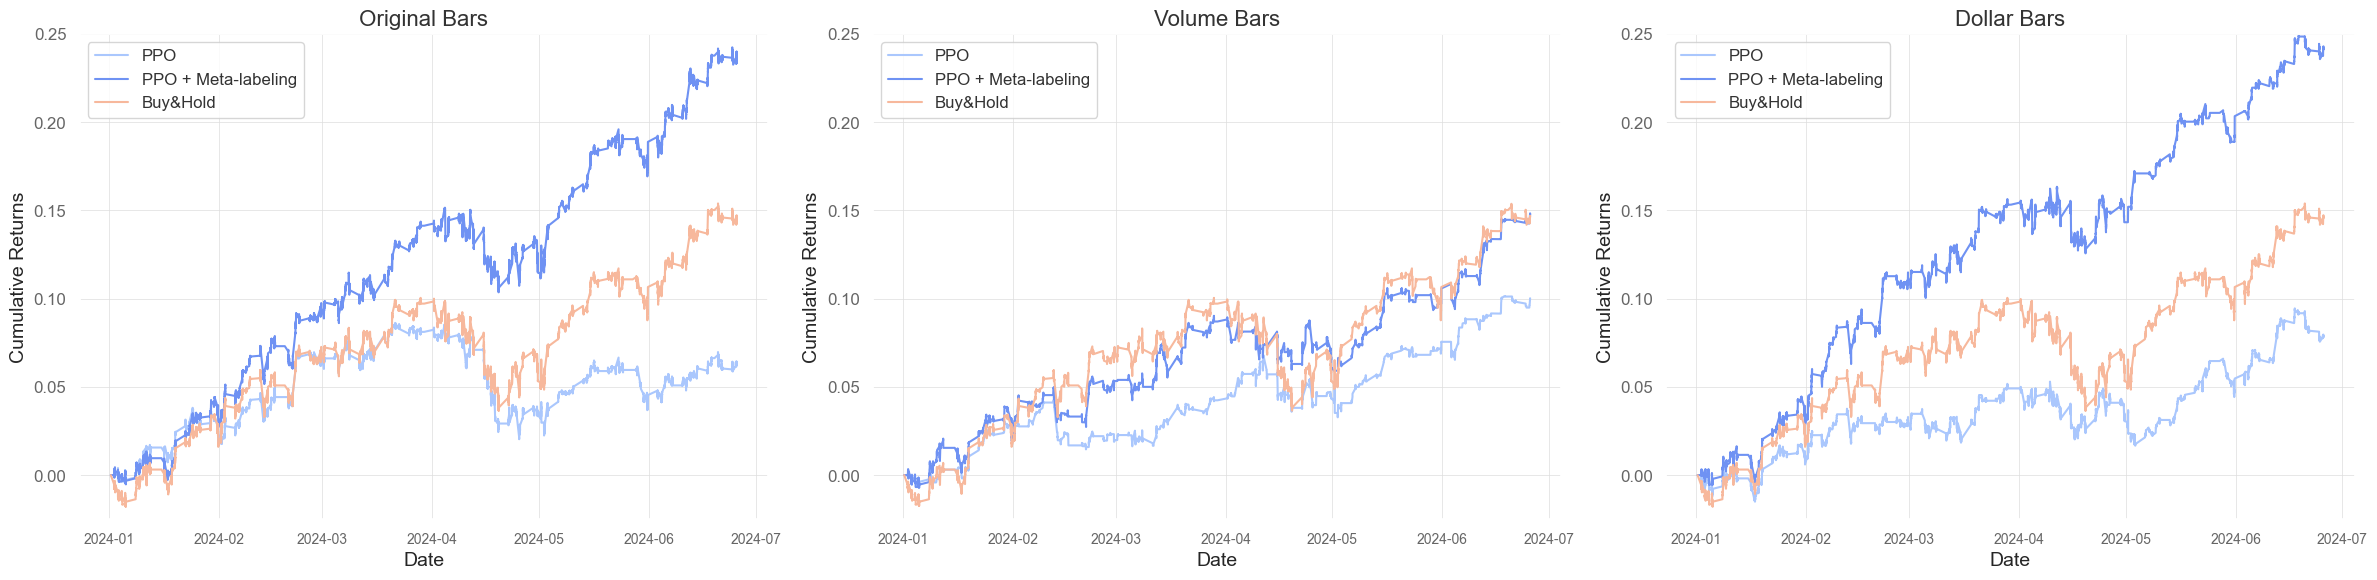

In [58]:
filename = 'final_spy_strategy_comparison_horizontal'
# plots en horizontal
plt.figure(figsize=(24, 6))

# Plot 1: Original Bars
plt.subplot(1, 3, 1)
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Original Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

# Plot 2: Volume Bars
plt.subplot(1, 3, 2)
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Volume Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

# Plot 3: Dollar Bars
plt.subplot(1, 3, 3)
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Dollar Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')

plt.show()

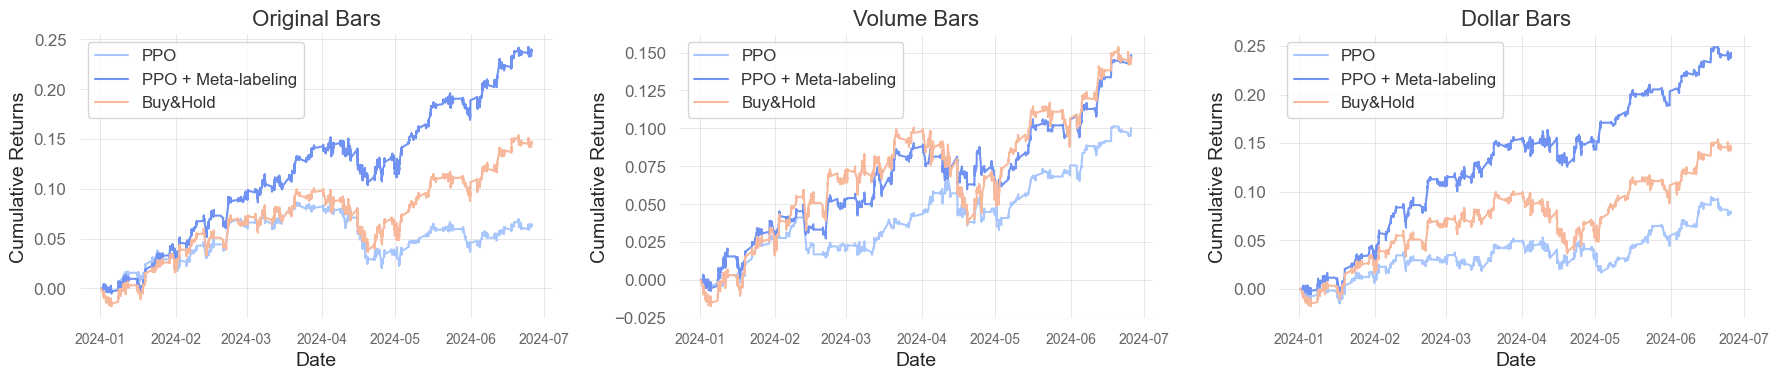

In [51]:
# Horizontal plots
plt.figure(figsize=(18, 4))

# Plot 1
plt.subplot(1, 3, 1)
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Original Bars', fontsize=16)  # Ajustar el tamaño del título
plt.xlabel('Date', fontsize=14)  # Cambiar el texto del eje X
plt.ylabel('Cumulative Returns', fontsize=14)  # Cambiar el texto del eje Y
plt.xticks(fontsize=10)  # Ajustar el tamaño de los xticks
plt.legend()

# Plot 2
plt.subplot(1, 3, 2)
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Volume Bars', fontsize=16)  # Ajustar el tamaño del título
plt.xlabel('Date', fontsize=14)  # Cambiar el texto del eje X
plt.ylabel('Cumulative Returns', fontsize=14)  # Cambiar el texto del eje Y
plt.xticks(fontsize=10)  # Ajustar el tamaño de los xticks
plt.legend()

# Plot 3
plt.subplot(1, 3, 3)
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Dollar Bars', fontsize=16)  # Ajustar el tamaño del título
plt.xlabel('Date', fontsize=14)  # Cambiar el texto del eje X
plt.ylabel('Cumulative Returns', fontsize=14)  # Cambiar el texto del eje Y
plt.xticks(fontsize=10)  # Ajustar el tamaño de los xticks
plt.legend()

plt.tight_layout()
plt.show()

# Resultados BTC